# EDA on student dataset


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## 1. checking for null,duplicate or missing values


In [6]:
df=pd.read_csv('data\StudentsPerformance.csv')

In [7]:
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
print(df.isnull().sum())
print(df.duplicated().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
0


### dataset don't have any duplicate and missing values

## 2. checking for number of unique coluumn values

In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## 3. checking column data-type 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 4. checking dataset statistics 

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### insights-

- Mean of Maths score, reading score and writing score is very close (66.80 - 68.05)
- Standard deviation of Maths score, reading score and writing score is also very close 15.8
- minimum score in maths is 0,reading is 17 and writing is much equal to 10


## 5. Exploring dataset

In [13]:
df_object_dtype=[feature for feature in df.columns if df[feature].dtype=='O']
df_int_dtype=[feature for feature in df.columns if df[feature].dtype!='O']

print(df_object_dtype)
print(df_int_dtype)


['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
['math score', 'reading score', 'writing score']


In [14]:
print("there are {} number are numerical feature they are {}".format(len(df_int_dtype),df_int_dtype))
print("there are {} number are numerical feature they are {}".format(len(df_object_dtype),df_object_dtype))

there are 3 number are numerical feature they are ['math score', 'reading score', 'writing score']
there are 5 number are numerical feature they are ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### insights --

- 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course' are of object datatype
- 'math score', 'reading score', 'writing score' are integer datatype

## 6. checking the unique values in object columns


In [15]:
for x in df_object_dtype:
    print(f'unique catogeries in "{x}" are -- {df[x].unique()}\n')

unique catogeries in "gender" are -- ['female' 'male']

unique catogeries in "race/ethnicity" are -- ['group B' 'group C' 'group A' 'group D' 'group E']

unique catogeries in "parental level of education" are -- ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

unique catogeries in "lunch" are -- ['standard' 'free/reduced']

unique catogeries in "test preparation course" are -- ['none' 'completed']



## 7. checking number of female and males completed the cource

In [16]:
print(df.groupby("gender")["test preparation course"].value_counts())

gender  test preparation course
female  none                       334
        completed                  184
male    none                       308
        completed                  174
Name: count, dtype: int64


### insights--

- 184 females completed the course and 174 males

## 8. adding df['total_score'] column and df['avg_score']

In [17]:
df["total_score"]=df['math score']+ df['reading score'] +df['writing score']
df["avg"]=df['total_score']/3
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## 9. checking the full score and less than 20 in reading, writing, math

In [18]:
maths_full_score=df[df['math score']== 100]['avg'].count()
reading_full_score=df[df['reading score']== 100]['avg'].count()
writing_full_score=df[df['writing score']== 100]['avg'].count()

print(f"number of students having full score in maths :{maths_full_score}")
print(f"number of students having full score in reading :{reading_full_score}")
print(f"number of students having full score in writing :{writing_full_score}")

number of students having full score in maths :7
number of students having full score in reading :17
number of students having full score in writing :14


In [19]:
maths_less_20=df[df['math score'] <= 20]['avg'].count()
reading_less_20=df[df['reading score'] <= 20]['avg'].count()
writing_less_20=df[df['writing score'] <= 20]['avg'].count()

print(f"number of students having less than 20 in maths :{maths_less_20}")
print(f"number of students having less than 20 in reading :{reading_less_20}")
print(f"number of students having less than 20 in writing :{writing_less_20}")

number of students having less than 20 in maths :4
number of students having less than 20 in reading :1
number of students having less than 20 in writing :3


# Visualisation

## 10. visualize avg_score with some conclusion

<Axes: xlabel='avg', ylabel='Count'>

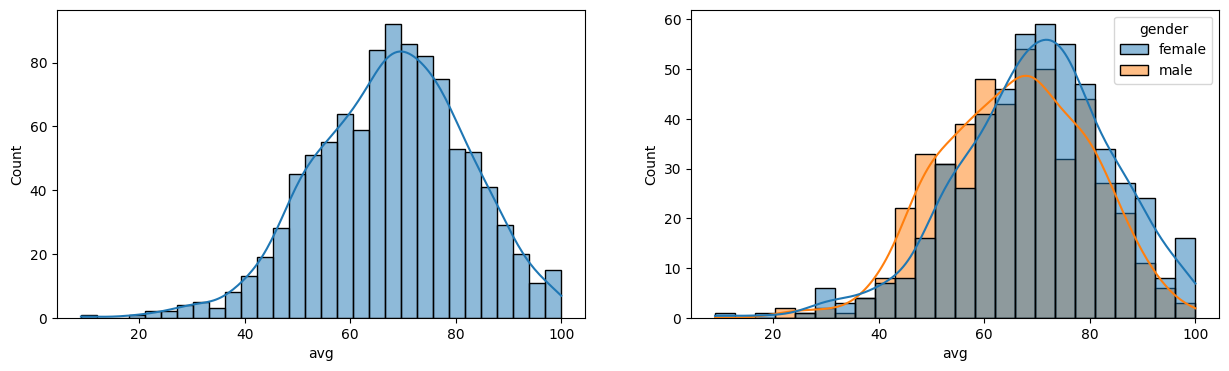

In [20]:
fig=plt.subplots(1,2,figsize=(15,4))
plt.subplot(122)
sns.histplot(kde=True,data=df,x=df['avg'],hue='gender')
plt.subplot(121)
sns.histplot(kde=True,data=df,x=df['avg'],bins=30)

### insights--

- female have highest performance than male

<Axes: xlabel='avg', ylabel='Count'>

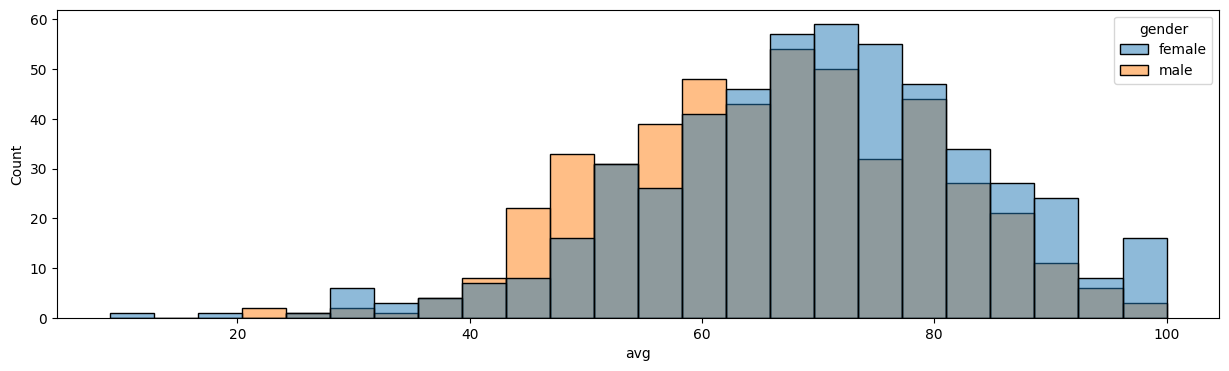

In [ ]:
fig,axs=plt.subplots(figsize=(15,4)) 
sns.histplot(data=df,x='avg',hue='gender')